In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, -1].values

In [3]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


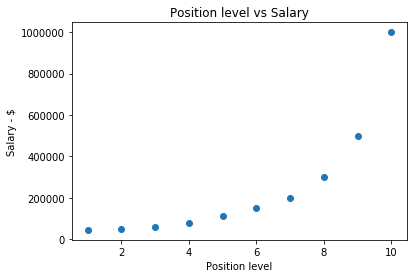

In [4]:
plt.title('Position level vs Salary')
plt.xlabel('Position level')
plt.ylabel('Salary - $')
plt.scatter(X, y)

## Fitting Linear Regression to the dataset

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
regressor_lin = LinearRegression()
regressor_lin.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Fitting Polynomial Regression to the dataset

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
poly_reg = PolynomialFeatures(5)
X_poly = poly_reg.fit_transform(X)

In [9]:
X_poly

array([[1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01,
        3.2000e+01],
       [1.0000e+00, 3.0000e+00, 9.0000e+00, 2.7000e+01, 8.1000e+01,
        2.4300e+02],
       [1.0000e+00, 4.0000e+00, 1.6000e+01, 6.4000e+01, 2.5600e+02,
        1.0240e+03],
       [1.0000e+00, 5.0000e+00, 2.5000e+01, 1.2500e+02, 6.2500e+02,
        3.1250e+03],
       [1.0000e+00, 6.0000e+00, 3.6000e+01, 2.1600e+02, 1.2960e+03,
        7.7760e+03],
       [1.0000e+00, 7.0000e+00, 4.9000e+01, 3.4300e+02, 2.4010e+03,
        1.6807e+04],
       [1.0000e+00, 8.0000e+00, 6.4000e+01, 5.1200e+02, 4.0960e+03,
        3.2768e+04],
       [1.0000e+00, 9.0000e+00, 8.1000e+01, 7.2900e+02, 6.5610e+03,
        5.9049e+04],
       [1.0000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03, 1.0000e+04,
        1.0000e+05]])

In [10]:
regressor_poly = LinearRegression()
regressor_poly.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Visualising the Linear Regression results

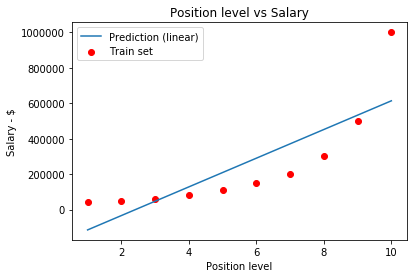

In [11]:
plt.title('Position level vs Salary')
plt.xlabel('Position level')
plt.ylabel('Salary - $')
plt.scatter(X, y, color='red', label='Train set')
plt.plot(X, regressor_lin.predict(X), label='Prediction (linear)')
plt.legend()

## Visualising the Polynomial Regression results

In [12]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

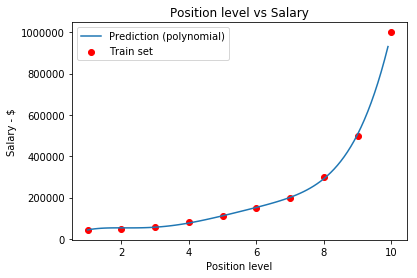

In [13]:
plt.title('Position level vs Salary')
plt.xlabel('Position level')
plt.ylabel('Salary - $')
plt.scatter(X, y, color='red', label='Train set')
plt.plot(X_grid, regressor_poly.predict(poly_reg.fit_transform(X_grid)), label='Prediction (polynomial)')
plt.legend()

## Comparison of predictions and score

**Linear**

In [23]:
regressor_lin.predict([[6.5]])

array([330378.78787879])

In [24]:
regressor_lin.score(X, y)

0.6690412331929895

**Polynomial**

In [22]:
regressor_poly.predict(poly_reg.fit_transform([[6.5]]))

array([174878.07765118])

In [26]:
regressor_poly.score(X_poly, y)

0.9997969027099753